In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU
from os.path import join
from os import environ

In [2]:
Autoencoder = tf.keras.models.load_model('k_fold_best_model_new_architecture_test3')

In [3]:
home=environ['HOME']
folder1='GRIMech_CH4_models_RS3_15_trajectories'
folder2='Datasets'

cantera_species=pd.read_csv(join(home, folder1,folder2,'State_space_cte_pressure_T1418_st-quarter_phi_4.csv'))
cantera_species=pd.DataFrame(cantera_species)

cantera_sources=pd.read_csv(join(home,folder1,folder2,'Reaction_rates_cte_pressure_T1418_st-quarter_phi_4.csv'))
cantera_sources=pd.DataFrame(cantera_sources)

maximum_values=pd.read_csv(join(home,folder1,folder2,'maximum_values_T1418.csv'))
maximum_values=pd.DataFrame(maximum_values)

In [4]:
def hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values):
    cantera_sources=cantera_sources.add_suffix('w')
    cantera_sources=cantera_sources.iloc[:,1:] #for taking out the timestep as data 
    
    cantera_time=cantera_species.iloc[:,1]
    cantera_temperature=cantera_species.iloc[:,2]
    cantera_pressure=cantera_species.iloc[:,3]
    
    cantera_species_fractions=cantera_species.iloc[:,4:]
    print(np.shape(cantera_species_fractions))
    
    cantera_species_fractions=cantera_species_fractions.loc[:,(cantera_species!=0).any(axis=0)]
    cantera_species_fractions=cantera_species_fractions.loc[:, (cantera_species != cantera_species.iloc[0]).any()]
    print(np.shape(cantera_species_fractions))
    
    n_columns_mass_fraction=np.shape(cantera_species_fractions)[1]
    print(n_columns_mass_fraction)
    
    cantera_sources=cantera_sources.loc[:,(cantera_sources!=0).any(axis=0)]
    cantera_sources=cantera_sources.loc[:, (cantera_sources != cantera_sources.iloc[0]).any()]
    
    print(np.shape(cantera_sources))
    n_columns_source=np.shape(cantera_sources)[1]
    print(n_columns_source)
    
    cantera_data=pd.concat([cantera_time, cantera_temperature,cantera_species_fractions,cantera_sources],axis=1)

    maximum_values=maximum_values.iloc[:,1:]
    maximum_values=pd.concat([maximum_values.iloc[:,0:2],maximum_values.iloc[:,3:]],axis=1)
    #print(maximum_values)
    
    maximum_values=maximum_values.to_numpy()
    #print(np.shape(maximum_values))
    
    iterations=np.shape(cantera_data)[1]
    
    #cantera_data.divide(maximum_values)
    for j in range(iterations):
        cantera_data.iloc[:,j]=cantera_data.iloc[:,j]/(maximum_values[0,j])
        #print(maximum_values[0,j])
    
    cantera_data_shift=cantera_data.loc[1:,:]
    cantera_data_shift=cantera_data_shift.add_suffix('shift')
    
    cantera_data=cantera_data.reset_index()
    cantera_data_shift=cantera_data_shift.reset_index()
    
    cantera_data=cantera_data.iloc[:,1:]
    cantera_data_shift=cantera_data_shift.iloc[:,1:]

    cantera_data=cantera_data.iloc[0:(np.shape(cantera_data_shift)[0]),:]
    
    data_all=pd.concat([cantera_data, cantera_data_shift], axis=1)

    columns=data_all.columns.to_list()
    
    return data_all, n_columns_source, n_columns_mass_fraction, columns

In [5]:
dataset, n_columns_source, n_columns_mass_fraction, columns=hydrogen_data_clean_shift_grimech_cantera(cantera_species,cantera_sources,maximum_values)

(120000, 49)
(120000, 30)
30
(120000, 30)
30


In [6]:
dataset

,t[s],T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,...,CH3OHwshift,C2Hwshift,C2H2wshift,C2H3wshift,C2H4wshift,C2H5wshift,C2H6wshift,HCCOwshift,CH2COwshift,HCCOHwshift
0,0.000008,0.405009,1.627896e-11,1.069746e-09,3.081275e-11,0.917102,1.726096e-11,2.030119e-13,0.000001,9.356466e-10,...,2.226449e-09,5.453499e-28,7.107906e-17,9.083291e-18,2.359628e-08,8.919523e-06,-6.735126e-04,4.258042e-27,2.746757e-27,1.723178e-28
1,0.000017,0.405009,6.327216e-11,2.047338e-09,1.174471e-10,0.917102,6.680972e-11,1.507144e-12,0.000002,3.740312e-09,...,4.830151e-09,2.805023e-27,1.608637e-16,2.720588e-17,3.571548e-08,9.081654e-06,-6.736609e-04,3.013245e-26,1.914592e-26,1.254414e-27
2,0.000025,0.405009,1.383876e-10,2.940988e-09,2.518755e-10,0.917102,1.454359e-10,4.898347e-12,0.000003,8.413043e-09,...,8.281808e-09,8.969435e-27,2.877015e-16,5.900185e-17,4.805449e-08,9.245920e-06,-6.738115e-04,1.195827e-25,7.692590e-26,5.117373e-27
3,0.000033,0.405009,2.391910e-10,3.758410e-09,4.268018e-10,0.917102,2.500509e-10,1.128746e-11,0.000004,1.495242e-08,...,1.248731e-08,2.188994e-26,4.522697e-16,1.070162e-16,6.061536e-08,9.411089e-06,-6.739639e-04,3.446839e-25,2.264192e-25,1.515232e-26
4,0.000042,0.405009,3.634898e-10,4.506554e-09,6.358713e-10,0.917102,3.778131e-10,2.148043e-11,0.000005,2.335704e-08,...,1.736305e-08,4.510733e-26,6.552487e-16,1.732675e-16,7.339868e-08,9.576086e-06,-6.741177e-04,8.113308e-25,5.460371e-25,3.660619e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.999958,0.963013,3.588549e-01,5.582894e-01,9.695989e-01,0.218768,1.000000e+00,7.773435e-01,0.057775,4.283569e-02,...,-1.109028e-22,1.257340e-25,-1.526746e-25,-2.856138e-29,-6.862299e-30,-2.194939e-32,-1.455564e-34,-5.621477e-24,-6.832914e-24,-1.326862e-25
119995,0.999967,0.963013,3.588549e-01,5.582894e-01,9.695989e-01,0.218768,1.000000e+00,7.773435e-01,0.057775,4.283569e-02,...,-2.038433e-22,-2.911572e-25,-1.318559e-25,-4.948057e-29,-4.858237e-30,-9.144425e-33,8.272079e-35,1.479738e-23,-3.512078e-24,-1.552376e-25
119996,0.999975,0.963013,3.588549e-01,5.582894e-01,9.695989e-01,0.218768,1.000000e+00,7.773435e-01,0.057775,4.283569e-02,...,-2.085329e-22,-1.718203e-25,-1.331025e-25,-4.739379e-29,-4.852981e-30,-9.052740e-33,8.492554e-35,1.623009e-23,-3.543901e-24,-1.376685e-25
119997,0.999983,0.963013,3.588549e-01,5.582894e-01,9.695989e-01,0.218768,1.000000e+00,7.773435e-01,0.057775,4.283569e-02,...,1.424403e-22,-1.301803e-24,-5.646741e-26,-6.701976e-29,-4.091132e-30,9.520450e-33,-7.186660e-35,-2.689380e-23,-7.520954e-24,-7.255783e-25


In [7]:
results=Autoencoder.decoder(Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy()))).numpy()

In [8]:
interest_vector=['T[K]','CH3', 'CH4', 'H2O','O2','H2','OH','HO2','H2O2']

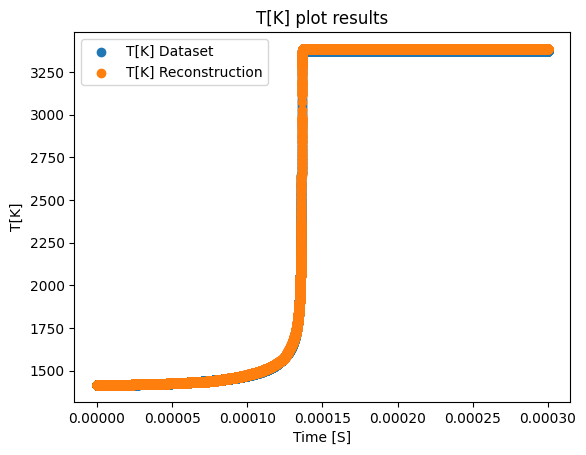

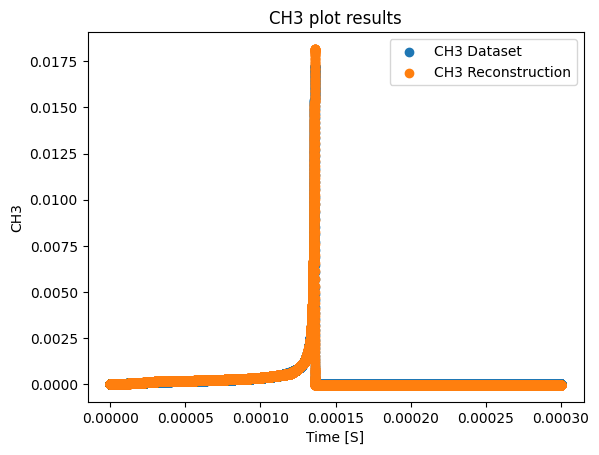

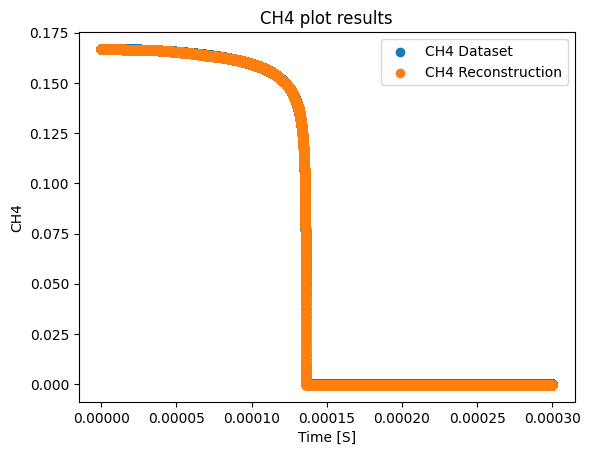

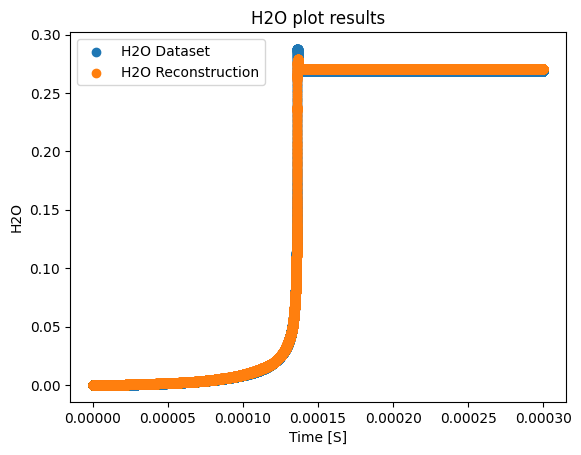

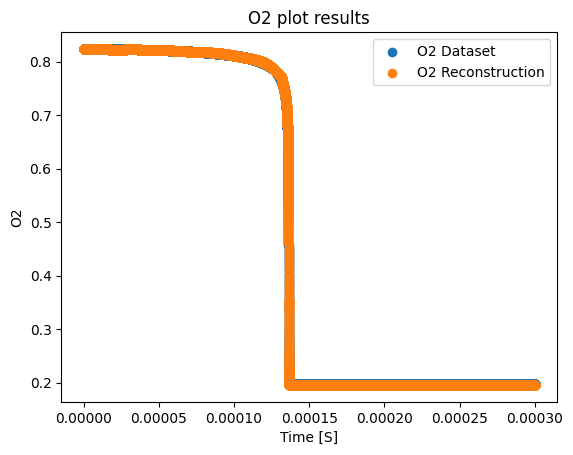

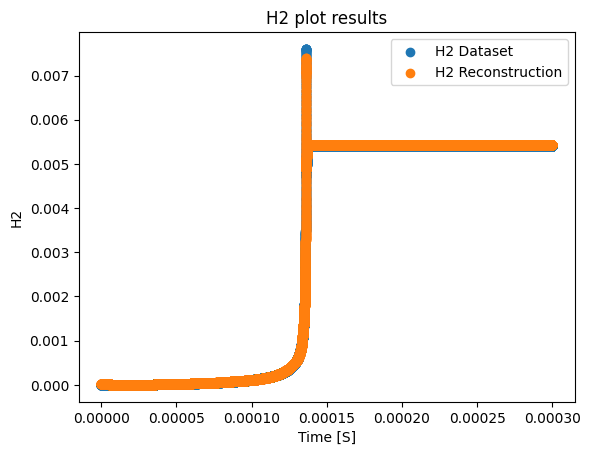

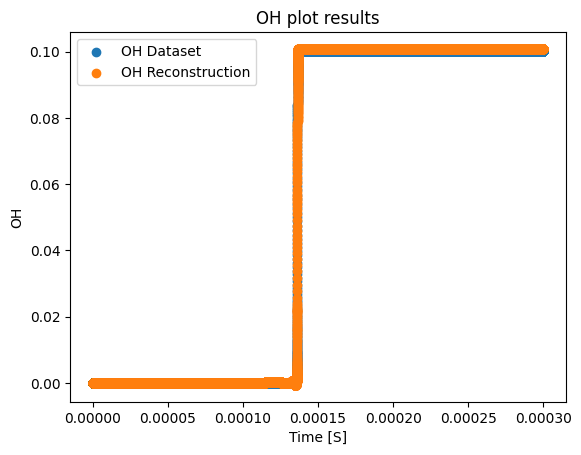

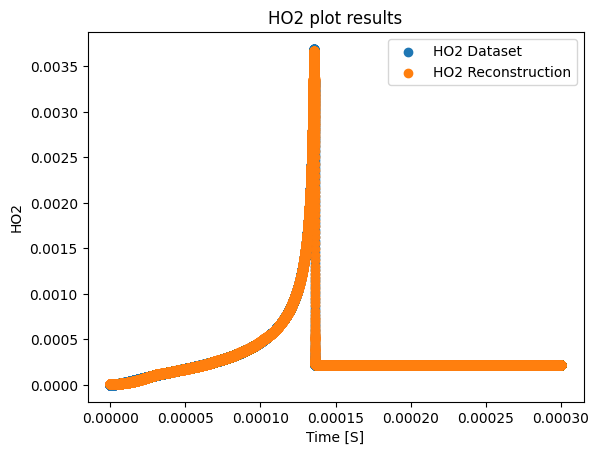

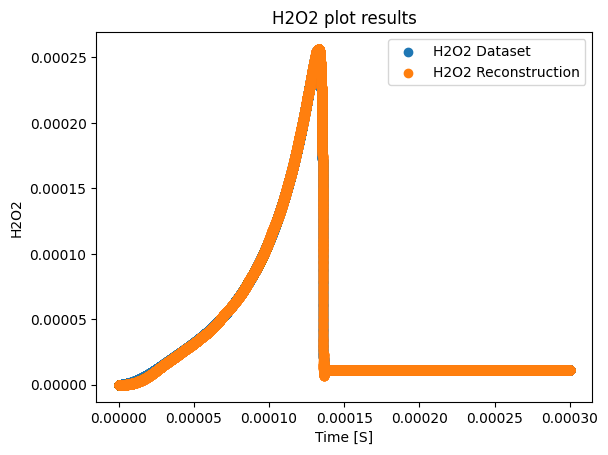

In [9]:
t_index=columns.index('t[s]shift')
t_trans=maximum_values.columns.get_loc('t[s]')
time_plot=(dataset.iloc[:,t_index])*maximum_values.iloc[0,t_trans]
    
for k in range(len(interest_vector)):
    original_index=columns.index(interest_vector[k]+'shift')
    #print(columns[original_index])
    results_index=columns.index(interest_vector[k]) #minues one due to the time column presence 
    #print(columns[results_index])
    #print(results_index-1)
    transformation_index=maximum_values.columns.get_loc(interest_vector[k])
    plot_name=interest_vector[k]+'.png'
    
    input_label=interest_vector[k]+' Dataset'
    output_label=interest_vector[k]+' Reconstruction'
    
    original=(dataset.iloc[:,original_index]).to_numpy()
    #original=original*transformation_values[1,original_index]
    #original=original+transformation_values[0,original_index]
    #original=np.exp(original)-1
    original=original*maximum_values.iloc[0,transformation_index]
    
    output=(results[:,results_index-1])
    #output=output*transformation_values[1,results_index]
    #output=output+transformation_values[0,results_index]
    #output=np.exp(output)-1
    output=output*maximum_values.iloc[0,transformation_index]
    
    plt.figure(k)
    plt.scatter(time_plot,original, label=input_label)
    plt.scatter(time_plot,output, label=output_label)
    plt.title(interest_vector[k]+' plot results')
    plt.xlabel('Time [S]')
    plt.ylabel(interest_vector[k])
    plt.legend()

In [10]:
latent_space=Autoencoder.lat_activation(Autoencoder.encoder(dataset.iloc[:,1:2+n_columns_mass_fraction].to_numpy())).numpy()

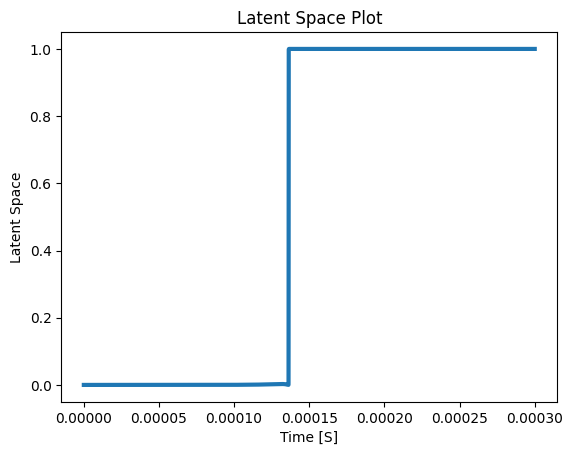

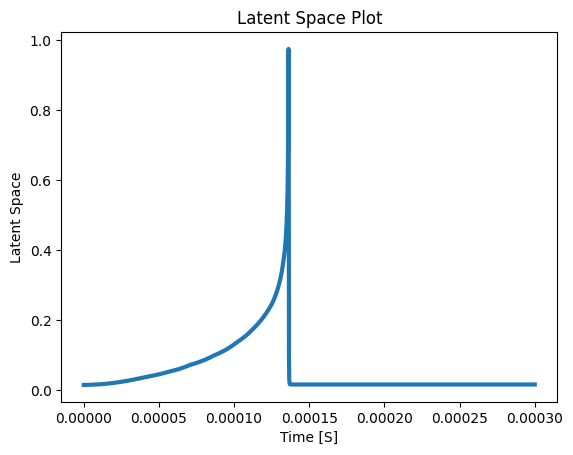

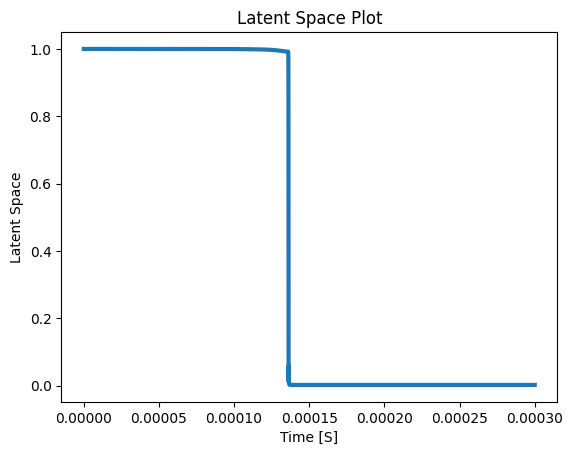

In [11]:
reduced_size=3

if reduced_size==1:
    plt.figure()
    plt.plot(time_plot,latent_space,linewidth=3)
    plt.title('Latent Space Plot')
    plt.xlabel('Time [S]')
    plt.ylabel('Latent Space')
else: 
    for i in range(reduced_size):
            plt.figure(i)
            plt.plot(time_plot,latent_space[:,i],linewidth=3)
            plt.title('Latent Space Plot')
            plt.xlabel('Time [S]')
            plt.ylabel('Latent Space')

In [12]:
corr_dataset=dataset.iloc[:,1:2+n_columns_mass_fraction+n_columns_source]
corr_columns=corr_dataset.columns.to_list()
corr_dataset

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.405009,1.627896e-11,1.069746e-09,3.081275e-11,0.917102,1.726096e-11,2.030119e-13,0.000001,9.356466e-10,1.118658e-35,...,5.775818e-10,3.295029e-29,1.767391e-17,1.420404e-18,1.169303e-08,8.760942e-06,-6.733672e-04,1.481576e-28,1.064939e-28,5.832671e-30
1,0.405009,6.327216e-11,2.047338e-09,1.174471e-10,0.917102,6.680972e-11,1.507144e-12,0.000002,3.740312e-09,5.342429e-34,...,2.226449e-09,5.453499e-28,7.107906e-17,9.083291e-18,2.359628e-08,8.919523e-06,-6.735126e-04,4.258042e-27,2.746757e-27,1.723178e-28
2,0.405009,1.383876e-10,2.940988e-09,2.518755e-10,0.917102,1.454359e-10,4.898347e-12,0.000003,8.413043e-09,4.350518e-33,...,4.830151e-09,2.805023e-27,1.608637e-16,2.720588e-17,3.571548e-08,9.081654e-06,-6.736609e-04,3.013245e-26,1.914592e-26,1.254414e-27
3,0.405009,2.391910e-10,3.758410e-09,4.268018e-10,0.917102,2.500509e-10,1.128746e-11,0.000004,1.495242e-08,-4.705514e-32,...,8.281808e-09,8.969435e-27,2.877015e-16,5.900185e-17,4.805449e-08,9.245920e-06,-6.738115e-04,1.195827e-25,7.692590e-26,5.117373e-27
4,0.405009,3.634898e-10,4.506554e-09,6.358713e-10,0.917102,3.778131e-10,2.148043e-11,0.000005,2.335704e-08,-2.239326e-31,...,1.248731e-08,2.188994e-26,4.522697e-16,1.070162e-16,6.061536e-08,9.411089e-06,-6.739639e-04,3.446839e-25,2.264192e-25,1.515232e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,0.963013,3.588549e-01,5.582894e-01,9.695989e-01,0.218768,1.000000e+00,7.773435e-01,0.057775,4.283569e-02,5.861046e-07,...,-1.089926e-22,6.917577e-26,-1.533521e-25,-2.941121e-29,-6.949294e-30,-2.162955e-32,-1.388997e-34,-6.972611e-24,-6.777808e-24,-1.290150e-25
119995,0.963013,3.588549e-01,5.582894e-01,9.695989e-01,0.218768,1.000000e+00,7.773435e-01,0.057775,4.283569e-02,5.861046e-07,...,-1.109028e-22,1.257340e-25,-1.526746e-25,-2.856138e-29,-6.862299e-30,-2.194939e-32,-1.455564e-34,-5.621477e-24,-6.832914e-24,-1.326862e-25
119996,0.963013,3.588549e-01,5.582894e-01,9.695989e-01,0.218768,1.000000e+00,7.773435e-01,0.057775,4.283569e-02,5.861046e-07,...,-2.038433e-22,-2.911572e-25,-1.318559e-25,-4.948057e-29,-4.858237e-30,-9.144425e-33,8.272079e-35,1.479738e-23,-3.512078e-24,-1.552376e-25
119997,0.963013,3.588549e-01,5.582894e-01,9.695989e-01,0.218768,1.000000e+00,7.773435e-01,0.057775,4.283569e-02,5.861046e-07,...,-2.085329e-22,-1.718203e-25,-1.331025e-25,-4.739379e-29,-4.852981e-30,-9.052740e-33,8.492554e-35,1.623009e-23,-3.543901e-24,-1.376685e-25


In [13]:
iterations=np.shape(corr_dataset)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes=np.zeros(iterations) #rows, columns
    corr_indexes=np.array([corr_indexes])
    
    for j in range(iterations):
        corr_indexes[:,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space)
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)
else: 
    
    corr_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes[k,j],_=stats.kendalltau(corr_dataset.iloc[:,j],latent_space[:,k])
    corr_indexes=pd.DataFrame(corr_indexes, columns=corr_columns)

In [14]:
corr_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.832759,0.835347,0.837444,0.836833,-0.836822,0.837219,0.830663,0.181907,-0.135607,0.827761,...,-0.339703,-0.340407,-0.344302,-0.344418,-0.341919,-0.377191,-0.059307,-0.341388,-0.343504,-0.343756
1,-0.248158,-0.288169,-0.289628,-0.289522,0.244237,-0.244353,-0.235865,0.402326,0.664309,-0.235371,...,0.703907,0.722377,0.718470,0.719192,0.710538,0.685545,0.241136,0.720647,0.719127,0.720449
2,-0.799825,-0.848131,-0.849512,-0.848998,0.800148,-0.800530,-0.791757,-0.154801,0.114191,-0.791226,...,0.313342,0.311269,0.314377,0.314889,0.314313,0.347353,0.034939,0.310642,0.312281,0.313506


H      0.837444
OH     0.837219
O      0.836833
CO2    0.836792
H2     0.835347
Name: 0, dtype: float64
CH2OH     0.836738
CH2       0.835343
HCCOH     0.816310
CH2CO     0.806438
CH2(S)    0.802720
Name: 1, dtype: float64
CH4     0.845850
O2      0.800148
C2H6    0.487092
CH3w    0.445074
Ow      0.420928
Name: 2, dtype: float64


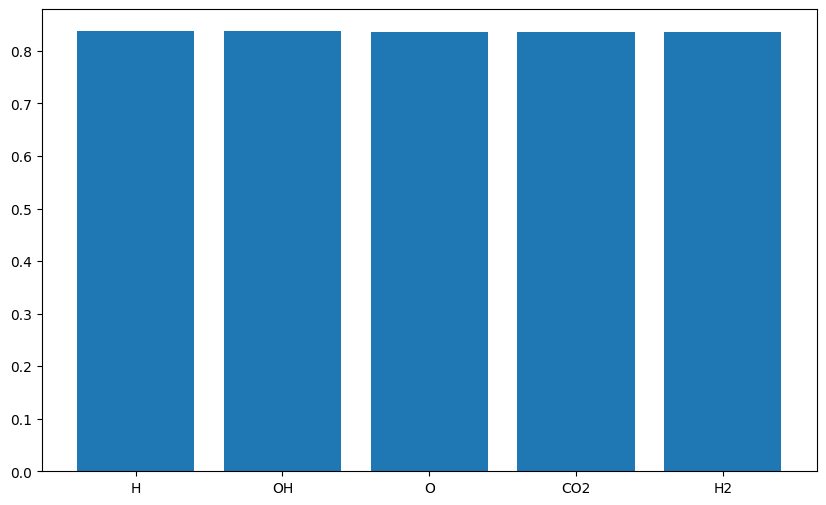

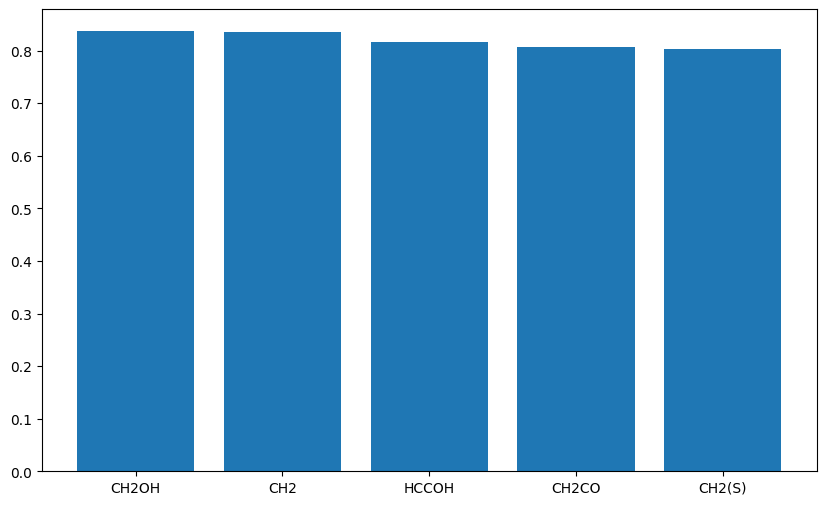

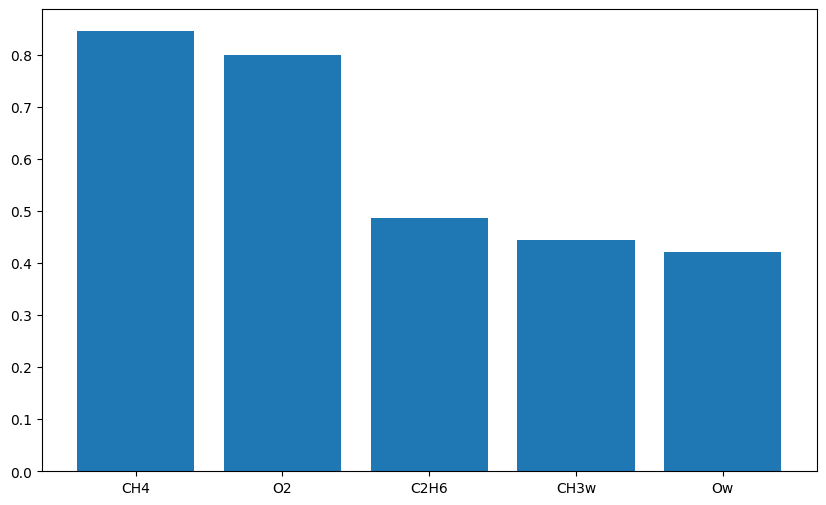

In [15]:
for m in range(reduced_size):
    
    indexes=corr_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [16]:
if reduced_size==1:
    spearman_indexes=np.zeros(iterations) #rows, columns
    spearman_indexes=np.array([spearman_indexes])
    
    for j in range(iterations):
        spearman_indexes[:,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space)
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)
else: 
    
    spearman_indexes=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            spearman_indexes[k,j],_=stats.spearmanr(corr_dataset.iloc[:,j],latent_space[:,k])
    spearman_indexes=pd.DataFrame(spearman_indexes, columns=corr_columns)

In [17]:
spearman_indexes

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.915735,0.913928,0.915945,0.915934,-0.915934,0.915940,0.911336,0.200201,-0.314070,0.907234,...,-0.700992,-0.699383,-0.707121,-0.707254,-0.703515,-0.711638,-0.123693,-0.701292,-0.705417,-0.705433
1,-0.543335,-0.569697,-0.573353,-0.573428,0.540202,-0.540206,-0.530737,0.478195,0.774837,-0.523615,...,0.799277,0.821272,0.819185,0.819888,0.807925,0.812893,0.277196,0.820122,0.819917,0.820829
2,-0.888512,-0.923118,-0.924242,-0.924310,0.888534,-0.888541,-0.882243,-0.180820,0.293692,-0.881774,...,0.678604,0.671644,0.680464,0.680864,0.679851,0.686043,0.105527,0.672554,0.677380,0.678116


H       0.915945
OH      0.915940
O       0.915934
CO2     0.915934
T[K]    0.915735
Name: 0, dtype: float64
CH2OH     0.914311
CH2       0.912798
HCCOH     0.898469
CH2CO     0.890596
CH2(S)    0.887410
Name: 1, dtype: float64
CH4     0.922010
O2      0.888534
C2H6    0.766478
Ow      0.730677
CH3w    0.723878
Name: 2, dtype: float64


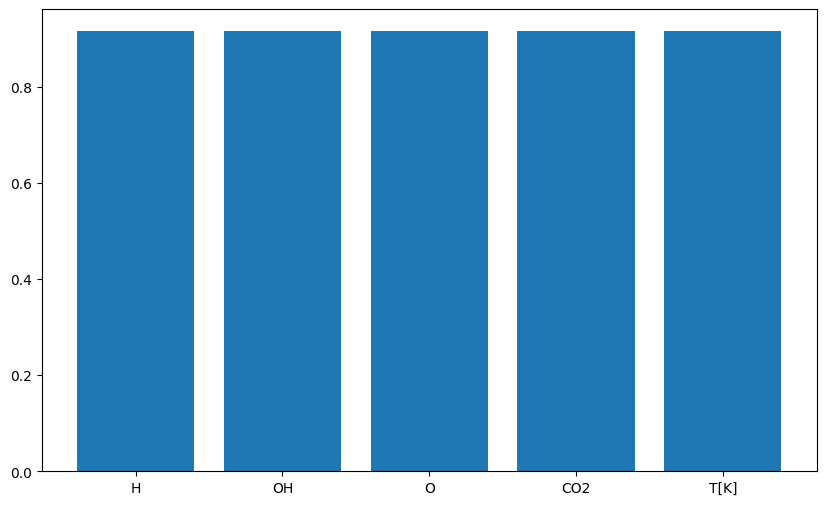

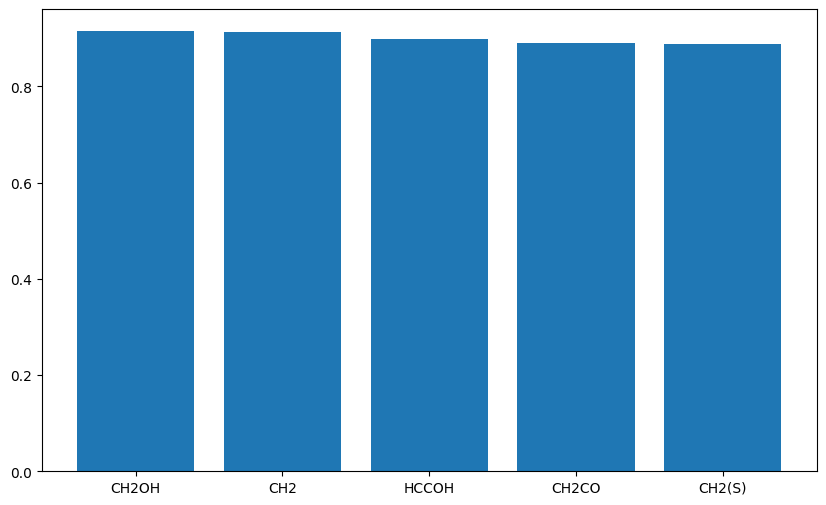

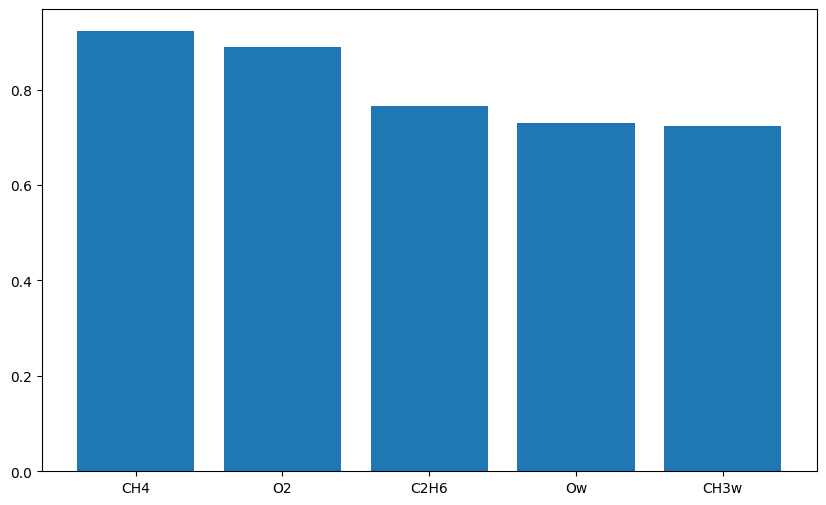

In [18]:
for m in range(reduced_size):
    
    indexes=spearman_indexes.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)

In [19]:
n_samples=np.shape(latent_space)[0]

corr_dataset_=corr_dataset.iloc[1:,:]

latent_space_=latent_space[0:n_samples-1,:]

In [20]:
print(np.shape(corr_dataset_))
print(np.shape(latent_space_))

(119998, 61)
(119998, 3)


In [21]:
iterations=np.shape(corr_dataset_)[1]

from scipy import stats 

if reduced_size==1:
    corr_indexes_=np.zeros(iterations) #rows, columns
    corr_indexes_=np.array([corr_indexes_])
    
    for j in range(iterations):
        corr_indexes_[:,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_)
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)
else: 
    
    corr_indexes_=np.zeros((reduced_size,iterations)) #rows, columns
    
    for k in range(reduced_size):
        for j in range(iterations):
            corr_indexes_[k,j],_=stats.kendalltau(corr_dataset_.iloc[:,j],latent_space_[:,k])
    corr_indexes_=pd.DataFrame(corr_indexes_, columns=corr_columns)

In [22]:
corr_indexes_

,T[K],H2,H,O,O2,OH,H2O,HO2,H2O2,C,...,CH3OHw,C2Hw,C2H2w,C2H3w,C2H4w,C2H5w,C2H6w,HCCOw,CH2COw,HCCOHw
0,0.832763,0.835349,0.837447,0.836835,-0.836824,0.837222,0.830644,0.181902,-0.135629,0.827763,...,-0.339690,-0.340411,-0.344286,-0.344402,-0.341904,-0.377172,-0.059334,-0.341393,-0.343509,-0.343761
1,-0.248152,-0.288143,-0.289602,-0.289497,0.244233,-0.244349,-0.235861,0.402320,0.664318,-0.235366,...,0.703892,0.722351,0.718455,0.719177,0.710523,0.685530,0.241152,0.720620,0.719100,0.720422
2,-0.799835,-0.848115,-0.849497,-0.848982,0.800157,-0.800538,-0.791766,-0.154798,0.114226,-0.791235,...,0.313363,0.311298,0.314395,0.314905,0.314331,0.347371,0.034967,0.310672,0.312311,0.313536


H      0.837447
OH     0.837222
O      0.836835
CO2    0.836795
H2     0.835349
Name: 0, dtype: float64
CH2OH     0.836729
CH2       0.835339
HCCOH     0.816302
CH2CO     0.806437
CH2(S)    0.802669
Name: 1, dtype: float64
CH4     0.845835
O2      0.800157
C2H6    0.487078
CH3w    0.445088
Ow      0.420918
Name: 2, dtype: float64


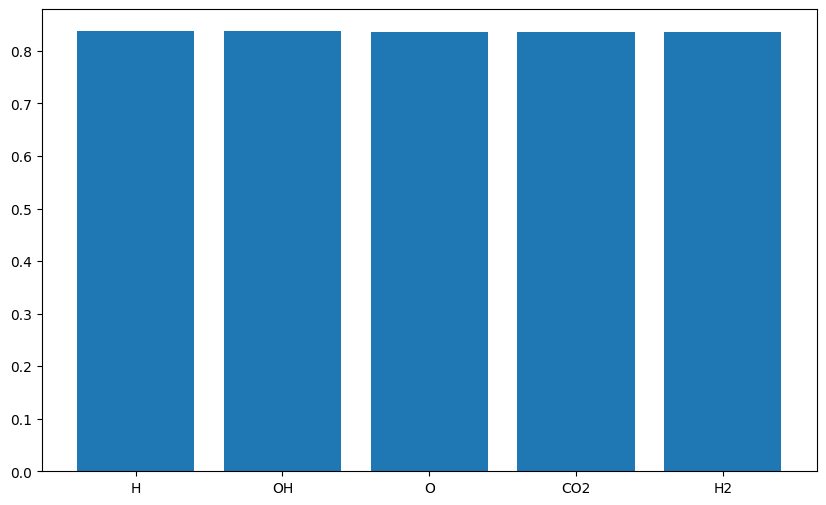

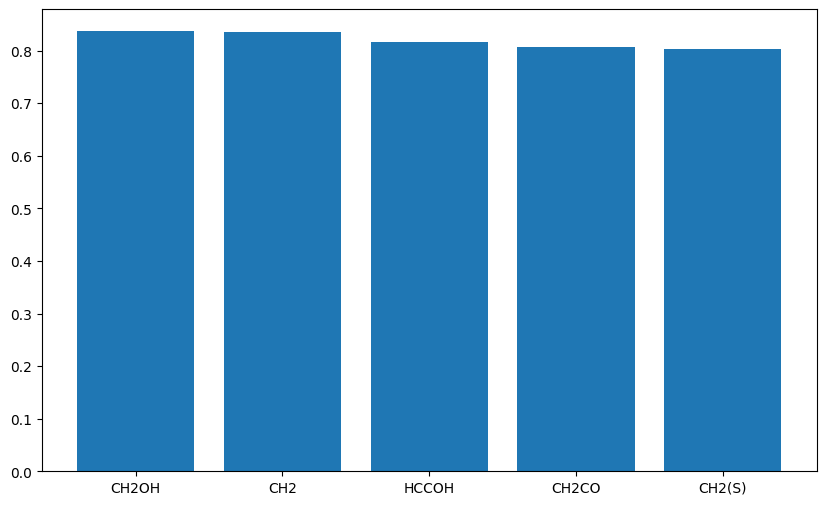

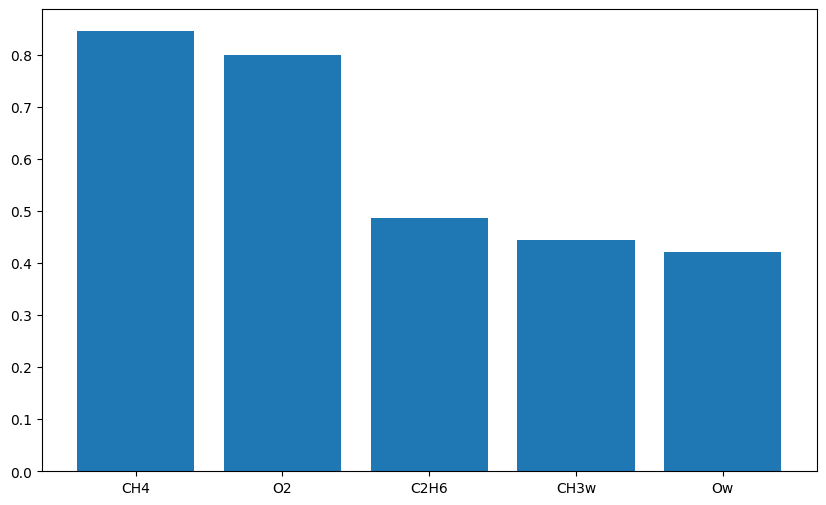

In [23]:
for m in range(reduced_size):
    
    indexes=corr_indexes_.iloc[m,:].sort_values(ascending=False)
    indexes=indexes.iloc[0:5]
    x=indexes.keys()
    height=indexes.iloc[:].to_numpy()
    plt.figure(m,figsize=(10, 6))
    plt.bar(x,height)
    #axes=indexes.plot.bar(x='Chemical Specie', y='Corellation Index',rot=reduced_size, subplots=True)
    #axes[1].legend(loc=reduced_size)
    print(indexes)